<a href="https://colab.research.google.com/github/JiaminJIAN/20MA573/blob/master/src/Monte_Carlo_Method_to_estimate_pi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Estimation of $\pi$: Crude Monte Carlo Method

### **Exercise 1:**

 Using the Algorithm 1, design estimator $\hat{\pi} (N)$ and compute $\hat{\pi} (10000)$.

### **Solution:**

In [0]:
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Design the estimator $\hat{\pi} (N)$:

In [0]:
def MCPI(N):
  n = 0
  for i in range(N):
    X = np.random.uniform(low=-1, high=1)  
    Y = np.random.uniform(low=-1, high=1)
    if X**2 + Y**2 < 1:
      n = n + 1
  return 4*n/N

Compute the $\hat{\pi} (10000)$ and get a estimator of $\pi$.

In [25]:
print("The esitmator of number \pi by the Monte Carlo mehtod is:")
print(MCPI(10000))

The esitmator of number \pi by the Monte Carlo mehtod is:
3.1452


We can plot the figure of Monte Carlo method to estimate the number $\pi$

Text(0, 0.5, 'Y')

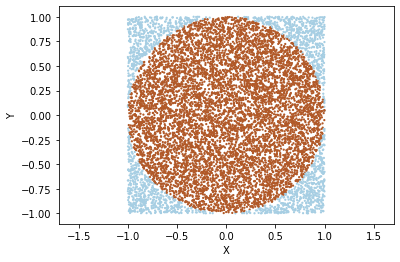

In [26]:
X = np.random.uniform(low=-1, high=1, size = 10000)  
Y = np.random.uniform(low=-1, high=1, size = 10000)
# calculate the distance of the point from the center 
distance = np.sqrt(X**2+Y**2);  
 
# check if point is inside the circle    
is_point_inside = distance<1.0

# some nice visualization
plt.scatter(X,Y, c=is_point_inside, s=5.0, edgecolors='none', cmap=plt.cm.Paired)  
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')

____

### **Exercise 2:**

Consider $\alpha_{n}$ is a sequence of estimators to the value $\alpha$. Prove that, if $MSE(\alpha_{n}) \to 0$, then $\alpha_{n}$ is $L^{2}$ consitent to $\alpha$.


### **Solution:**

Since $MSE(\alpha_{n}) = \mathbb{E}[(\alpha_{n} - \alpha)^{2}]$, and we have

$$\lim_{n \to + \infty} \mathbb{E}[(\alpha_{n} - \alpha)^{2}] = 0 ,$$

which exactly equivalent to the definition of $\alpha_{n}$ is $L^{2}$ consitent to $\alpha$. 


____

### **Exercise 3:**

Given i.i.d $\{\alpha_{i}: i \in 1, 2, \dots, N\}$, we use

$$\bar{\alpha}_{N} = \frac{1}{N} \sum_{i = 1}^{N} \alpha_{i}$$

as its estimator of the mean $\mathbb{E} [\alpha_{1}]$ and use

$$\beta_{N} = \frac{1}{N} \sum_{i = 1}^{N}(\alpha_{i} - \bar{\alpha}_{N})^{2}$$

as the estimator of $Var(\alpha_{1})$. Suppose $\alpha_{1} \in L^{4}$, then

- Prove $\beta_{N}$ is biased.

- Prove that $\beta_{N}$ is consistent in $L^{2}$.

- Can you propose an unbiased estimator?


### **Solution:**

**(1): Method 1** 

 we can verify the proposition directly. Since $\{\alpha_{i}: i \in 1, 2, \dots, N\}$ is i.i.d random variable, we have

$$\mathbb{E} [\beta_{N}] = \mathbb{E} [\frac{1}{N} \sum_{i = 1}^{N}(\alpha_{i} - \bar{\alpha}_{N})^{2}] = \frac{1}{N} \sum_{i = 1}^{N} \mathbb{E} [\alpha_{i}^{2}] - \mathbb{E} [\bar{\alpha}_{N})^{2}], $$

and

$$\mathbb{E} [\bar{\alpha}_{N})^{2}] = \mathbb{E} [(\frac{1}{N} \sum_{i = 1}^{N} \alpha_{i})^{2}] = \frac{1}{N^{2}} \sum_{i = 1}^{N} \mathbb{E} [\alpha_{i}^{2}] + \frac{1}{N^{2}} \sum_{i \neq j}^{N} \mathbb{E}[\alpha_{i}] \mathbb{E}[\alpha_{j}], $$

then we know that

$$\mathbb{E} [\beta_{N}] = \frac{1}{N} \sum_{i = 1}^{N} \mathbb{E} [\alpha_{i}^{2}] - \frac{1}{N^{2}} \sum_{i = 1}^{N} \mathbb{E} [\alpha_{i}^{2}] - \frac{1}{N^{2}} \sum_{i \neq j}^{N} \mathbb{E}[\alpha_{i}] \mathbb{E}[\alpha_{j}] = \mathbb{E} [\alpha_{1}^{2}] - \frac{1}{N} \sum_{i = 1}^{N} \mathbb{E} [\alpha_{1}^{2}] - \frac{1}{N^{2}} (N^{2} - N) (\mathbb{E} [\alpha_{1}])^{2}.$$

So, we have

$$\mathbb{E} [\beta_{N}] = \frac{N-1}{N} \mathbb{E} [\alpha_{1}^{2}] - \frac{N-1}{N} (\mathbb{E} [\alpha_{1}])^{2} = \frac{N-1}{N} Var(\alpha_{1}),$$

and from the above equation we can see that $\beta_{N}$ is a biased estimator of $Var(\alpha_{1})$.


**Method 2:**

We denote $S_{N}^{2} = \frac{1}{N-1} \sum_{i = 1}^{N}(\alpha_{i} - \bar{\alpha}_{N})^{2}]$, which is the sample variance of the data set. Then by the fisher's lemma, we know that

$$\frac{(N-1) S_{N}^{2}}{Var(\alpha_{1})} \sim \chi^{2}(N-1) ,$$

then we have $\frac{N \beta_{N}}{Var(\alpha_{1})} \sim \chi^{2}(N-1) $. 

Since if $X \sim \chi^{2} (n)$, we have $\mathbb{E}[X] = n$ and $Var(X) = 2n$, then we know that $\mathbb{E}[\frac{N \beta_{N}}{Var(\alpha_{1})}] = N-1$, so that 

$$\mathbb{E}[ \beta_{N}] = \frac{N-1}{N} Var(\alpha_{1})$$

and $\beta_{N}$ is a biased estimator of $Var(\alpha_{1})$.

**(2):**

We want to verify that when $N \to + \infty$, $\mathbb{E}[(\beta_{N} - Var(\alpha_{1}))^{2}] = 0$. Since

$$\mathbb{E}[(\beta_{N} - Var(\alpha_{1}))^{2}] = \mathbb{E}[\beta_{N}^{2} - 2 Var(\alpha_{1}) \beta_{N} + (Var(\alpha_{1}))^{2}] = \mathbb{E}[\beta_{N}^{2}] - \frac{N-2}{N} (Var(\alpha_{1}))^{2},$$

and since 

$$\mathbb{E}[\beta_{N}^{2}] = Var(\beta_{N}) + (\mathbb{E}[\beta_{N}])^{2} = Var(\beta_{N}) + \Big( \frac{N-1}{N} \Big)^{2} (Var(\alpha_{1}))^{2},$$

we have

$$\mathbb{E}[(\beta_{N} - Var(\alpha_{1}))^{2}] = Var(\beta_{N})+ \frac{1}{N^{2}} (Var(\alpha_{1}))^{2}.$$

By the fisher's lemma, we have $\frac{N \beta_{N}}{Var(\alpha_{1})} \sim \chi^{2}(N-1) $, then we know that

$$Var(\beta_{N}) = \frac{2(N-1)}{N^{2}} (Var(\alpha_{1}))^{2},$$

so we get

$$\mathbb{E}[(\beta_{N} - Var(\alpha_{1}))^{2}] = \frac{2N-1}{N^{2}} (Var(\alpha_{1}))^{2}.$$

Since $\alpha_{1} \in L^{4}$, when $N \to + \infty$, we have $\mathbb{E}[(\beta_{N} - Var(\alpha_{1}))^{2}] = 0$, then we proved that $\beta_{N}$ is consistent in $L^{2}$.

**(3):**

By the result we get from (1), we have

$$\mathbb{E}[ \beta_{N}] = \frac{N-1}{N} Var(\alpha_{1}),$$

so we know that

$$\mathbb{E}[\frac{N}{N -1} \beta_{N}] = Var(\alpha_{1}),$$

and $\frac{1}{N-1} \sum_{i = 1}^{N}(\alpha_{i} - \bar{\alpha}_{N})^{2}]$ is a unbiased estimator of $Var(\alpha_{1})$.

____

### **Exercise 4:**

- Use $\beta_{100}$ of exercise 3 to estimate $MSE(\hat{\pi}_{N})$ by repeating $\pi_{N}$ of exercise 1. One must write both pseudocode and python code.

- Repeat above estimation of $MSE(\hat{\pi}_{N})$ for $N = 2^{-i}: i = 5, 6, \dots, 10$ and plot log-log chart.